# Predicting Coronavirus Spread with Facebook Prophet 

- Prediction could be inaccurate due to small dataset as deep learning techniques work best with more data and the prescence of effective treatment can influence the prediction

## Installation

pip install fbprophet

In [1]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install fbprophet

In [2]:
confirmed_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


In [3]:
def get_n_melt_data(data_url, case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={'variable':'Date', "value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
    new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
    return new_df


In [4]:
# Load EDA pkg
import pandas as pd 

In [5]:
confirm_df = get_n_melt_data(confirmed_cases,"Confirmed")
recovered_df = get_n_melt_data(recovered_cases,"Recovered")
deaths_df = get_n_melt_data(death_cases,"Deaths")

In [6]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
18171,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,4/1/20,6
18172,NaN,MS Zaandam,0.000000,0.000000,4/1/20,9
18173,NaN,Botswana,-22.328500,24.684900,4/1/20,4
18174,NaN,Burundi,-3.373100,29.918900,4/1/20,2
18175,NaN,Sierra Leone,8.460555,-11.779889,4/1/20,2


In [7]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [8]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [9]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
18171,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,4/1/20,6,NaN,0
18172,NaN,MS Zaandam,0.000000,0.000000,4/1/20,9,NaN,2
18173,NaN,Botswana,-22.328500,24.684900,4/1/20,4,NaN,1
18174,NaN,Burundi,-3.373100,29.918900,4/1/20,2,NaN,0
18175,NaN,Sierra Leone,8.460555,-11.779889,4/1/20,2,NaN,0


In [10]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [11]:
df['Province/State'].nunique()

79

In [12]:
df.shape

(18176, 8)

In [13]:
df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [14]:
df_per_day.tail()

,Confirmed,Recovered,Deaths
Date,,,
3/6/20,101801,62684.0,3460
3/7/20,105847,64409.0,3558
3/8/20,109821,66834.0,3802
3/9/20,113590,68330.0,3988
4/1/20,932605,0.0,46809


In [15]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,71.000000,71.000000,71.000000
mean,162492.676056,46209.915493,6771.915493
std,215343.239536,51742.877920,10529.097164
min,555.000000,0.000000,17.000000
25%,38635.000000,1751.500000,856.000000
50%,81388.000000,25278.000000,2770.000000
75%,161777.500000,74391.000000,6129.500000
max,932605.000000,213156.000000,46809.000000


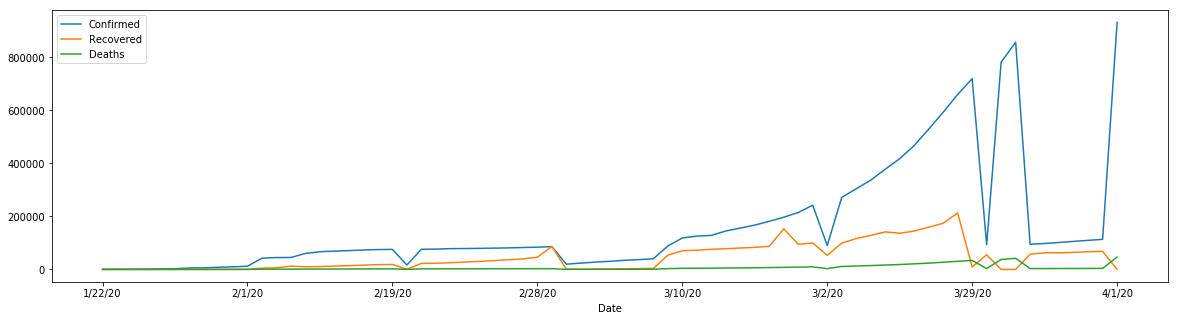

In [16]:
df_per_day.plot(kind='line',figsize=(20,5))

In [17]:
# Time Series Forecasting
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [18]:
# Model Initialize
from fbprophet import Prophet
import plotly
m = Prophet(weekly_seasonality=False)

In [19]:
m.add_seasonality(name="monthly",period=40.5,fourier_order=5)

In [20]:
# Split Dataset
df_per_day.head()

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28.0,17
1/23/20,654,30.0,18
1/24/20,941,38.0,26
1/25/20,1434,83.0,42
1/26/20,2118,63.0,56


In [21]:
global_cases = df_per_day.reset_index()

In [22]:
global_cases.tail()

,Date,Confirmed,Recovered,Deaths
66,3/6/20,101801,62684.0,3460
67,3/7/20,105847,64409.0,3558
68,3/8/20,109821,66834.0,3802
69,3/9/20,113590,68330.0,3988
70,4/1/20,932605,0.0,46809


In [23]:
confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]

In [24]:
confirmed_cases.shape

(71, 2)

In [25]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
train = confirmed_cases[:40]
test = confirmed_cases[40:]

In [53]:
train.tail()

,ds,y
35,2/6/20,30794
36,2/7/20,34391
37,2/8/20,37120
38,2/9/20,40150
39,3/1/20,88369


In [54]:
# Fit Model
m.fit(train)

Exception: Prophet object can only be fit once. Instantiate a new object.

In [55]:
# Future Date
future_dates = m.make_future_dataframe(periods=50) #periods=40
future_dates.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [56]:
# Prediction
prediction =  m.predict(future_dates)

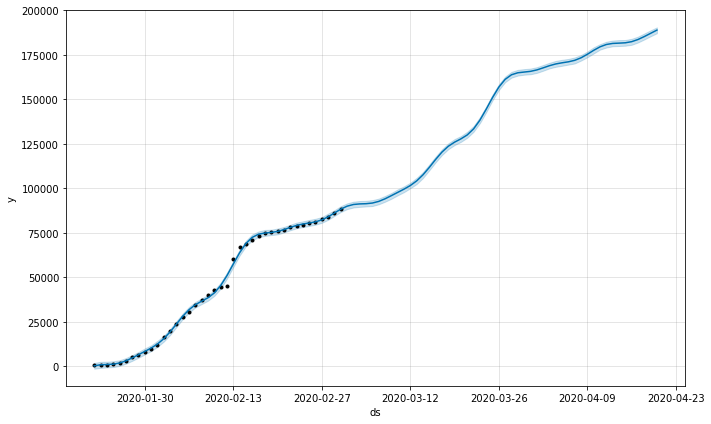

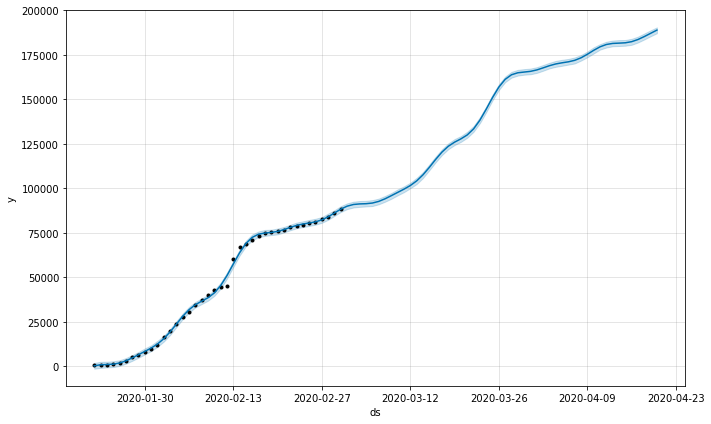

In [57]:
# Plot Prediction
m.plot(prediction)

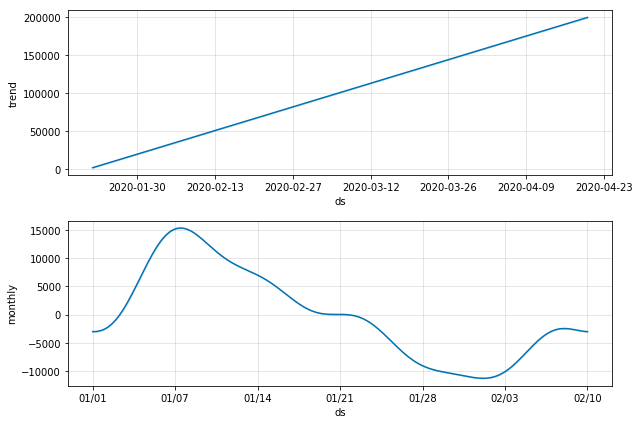

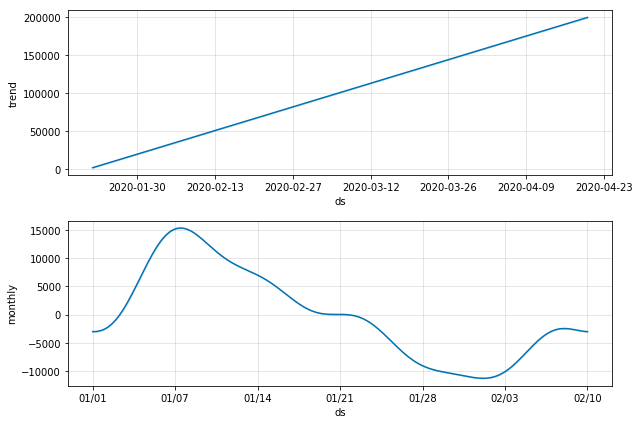

In [58]:
m.plot_components(prediction)

In [59]:
test

,ds,y
40,3/10/20,118620
41,3/11/20,125875
42,3/12/20,128352
43,3/13/20,145205
44,3/14/20,156101
45,3/15/20,167454
46,3/16/20,181574
47,3/17/20,197102
48,3/18/20,214821
49,3/19/20,242500


In [60]:
test['dates'] = pd.to_datetime(test['ds'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
test

,ds,y,dates
40,3/10/20,118620,2020-03-10
41,3/11/20,125875,2020-03-11
42,3/12/20,128352,2020-03-12
43,3/13/20,145205,2020-03-13
44,3/14/20,156101,2020-03-14
45,3/15/20,167454,2020-03-15
46,3/16/20,181574,2020-03-16
47,3/17/20,197102,2020-03-17
48,3/18/20,214821,2020-03-18
49,3/19/20,242500,2020-03-19


In [62]:
test = test.set_index("dates")

In [63]:
test = test['y']

In [64]:
import matplotlib.pyplot as plt

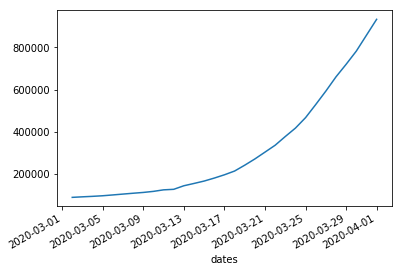

In [65]:
test.plot()

In [66]:
# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot

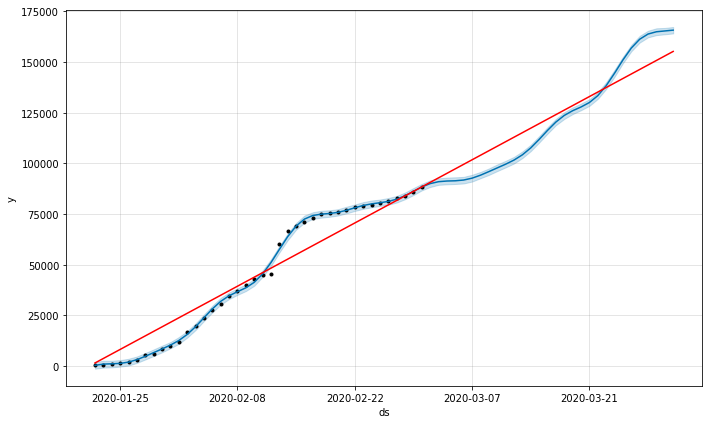

In [43]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)